<a href="https://colab.research.google.com/github/LucasColas/Project-with-CIFAR-10/blob/main/Training_Project_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
#from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.applications.vgg16 import VGG16

VGG_model = VGG16(weights="imagenet", include_top=False, input_shape=(32,32,3))
VGG_model.summary()

(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
print(X_train.dtype, y_train.shape, X_test.shape, y_test.shape)

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
______________________________________________________________

In [2]:
def sort_labels(y_train, y_test):

    Y_train = np.zeros((50000,10))
    Y_test = np.zeros((10000,10))
    for index, label in enumerate(y_train):
        Y_train[index, label] = 1

    for index, label in enumerate(y_test):
        Y_test[index, label] = 1


    return Y_train, Y_test

Y_train, Y_test = sort_labels(y_train, y_test)

In [3]:
VGG_model.trainable = True
set_trainable = False
for layer in VGG_model.layers:
  #print(layer.name)
  if layer.name == 'block5_conv3':
    set_trainable = True
  
  if set_trainable:
    layer.trainable = True 

  else:
    layer.trainable = False

In [4]:
VGG_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [5]:
X_train /= 255


model = models.Sequential()
model.add(VGG_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               131328    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 14,848,586
Trainable params: 2,493,706
Non-trainable params: 12,354,880
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/42
2188/2188 [==============================] - 26s 12ms/step - loss: 1.0626 - acc: 0.6297 - val_loss: 1.0915 - val_acc: 0.6166
Epoch 2/42
2188/2188 [==============================] - 25s 11ms/step - loss: 1.0093 - acc: 0.6475 - val_loss: 1.0467 - val_acc: 0.6335
Epoch 3/42
2188/2188 [==============================] - 25s 11ms/step - loss: 0.9690 - acc: 0.6595 - val_loss: 1.0261 - val_acc: 0.6416
Epoch 4/42
2188/2188 [==============================] - 25s 11ms/step - loss: 0.9356 - acc: 0.6679 - val_loss: 1.0663 - val_acc: 0.6307
Epoch 5/42
2188/2188 [==============================] - 30s 14ms/step - loss: 0.9012 - acc: 0.6809 - val_loss: 0.9726 - val_acc: 0.6591
Epoch 6/42
2188/2188 [==============================] - 30s 14ms/step - loss: 0.8802 - acc: 0.6907 - val_loss: 1.0240 - val_acc: 0.6414
Epoch 7/42
2188/2188 [==============================] - 25s 11ms/step - loss: 0.8555 - acc: 0.6983 - val_loss: 0.9648 - val_acc: 0.6607
Epoch 8/42
2188/2188 [==========================

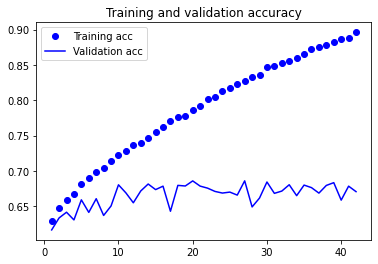

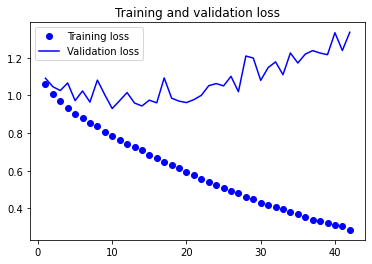

In [8]:



model.compile(optimizer=optimizers.SGD(lr=0.01),loss="categorical_crossentropy", metrics=["acc"])
history = model.fit(X_train, Y_train, batch_size=16, epochs=42, validation_split=(0.3))
model.save("training.h5")



acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo', label='Training acc')
plt.plot(epochs, val_acc,'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [ ]:
model.summary()